In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from itertools import chain
from matplotlib.ticker import MaxNLocator

#this function plots the 2-d conformational landscape representation
#the other function (further below) calculates fC value
#Rg2 and Ree2 are lists
#protein_label variable is a string which is the label of the protein on the 2d map
#provided_color is just the color to draw the protein scatter points for (GW will be black)


def plot_protein_against_GW(protein_rg2,protein_ree2,protein_label,provided_color):

    #x-axis label and y-axis label
    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"

    global fC_value

    
    #load the GW data
    testeq_GW = pd.read_csv('GW_chainlen100.csv')
    
    #calculate instantaneous shape ratio from available data
    testeq_GW['ratio'] = testeq_GW['Rend2'].values/testeq_GW['Rg2'].values
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]


    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)


    protein_rg = np.array(protein_rg2)**0.5
    rg_mean = np.mean(protein_rg)
    protein_ratio = np.array(protein_ree2)/np.array(protein_rg2)
    
    x_total.append(list(protein_rg/rg_mean))
    y_total.append(list(protein_ratio))                    
    
    del rg_mean

    #set these variables as lists
    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    
    
    
    #calculate fC value
    fC_value=fC_using_cdist(protein_rg2,protein_ree2,
                   protein_label,
                   testeq_GW,
                   len(y_total),
                   1,0.1)            
        




    # Set up default x and y limits and give error if these are not met
    max_x_val=3
    max_y_val=30
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')
    elif max(x_total)>max_x_val or min(x_total)<0:
        return print('ERROR')        
    elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
        return print('ERROR')
    elif max(y_total)>max_y_val or min(y_total)<0:
        return print('ERROR')        

    # Set up x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color=provided_color,
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)



    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = provided_color,
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    

    axTemperature.text(0.7,0.65,
                       '$f_C$= '+format(fC_value,'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)

    axTemp_legend=axTemperature.legend(fontsize=15,loc='upper right')

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')



    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)

    return 

#this function calculates fC value
def fC_using_cdist(protein_rg2,protein_ree2,
                   protein_name,GW_var,upto_protein_snapshots,GW_every_ith_snap,radius_):
    x_total=[]
    y_total=[]
    
    protein_rg = np.array(protein_rg2)**0.5
    rg_mean = np.mean(protein_rg)
    protein_ratio = np.array(protein_ree2)/np.array(protein_rg2)
    
    x_total.append(list(protein_rg/rg_mean))
    y_total.append(list(protein_ratio))                    
    

    protein_label='protein_'+protein_name

    del rg_mean
    
    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    
    #create a pandas dataframe of relative Rg and instantaneous shape ratio for protein
    poly_var=pd.DataFrame(data = zip(x_total,y_total),columns=['Rg/Rg_mean','ratio']).copy()
    
    #there is an option to skip snapshots for protein
    protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:upto_protein_snapshots,:].copy()
    protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
    del x_total, y_total
    
    #the GW_po variable is for GW 
    GW_po=GW_var[['Rg/Rg_mean','ratio']][::GW_every_ith_snap].copy()
    GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])
    
    #calculate mean and stdev values (must keep same mean and stdev values)
    #calculating mean and stdev values of Rg/Rg_mean and shape ratio for GW
    upto_snapshots=720000
    GW_mean_Rg_Rg_mean=np.mean(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_ratio=np.mean(GW_var['ratio'].values[0:(upto_snapshots+1)])
    GW_std_ratio=np.std(GW_var['ratio'].values[0:(upto_snapshots+1)])
    
    
    #create a pandas dataframe with combined GW and protein Rg/Rg_mean and instantaneous shape ratio 
    combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
    
    #transform all the Rg/Rg_mean and ins. shape ratio values (belonging to both protein and GW)
    combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
    combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/(GW_std_ratio)
    
    #isolate the transformed Rg/Rg_mean and instantaneous shape ratio values into separate variables for protein & GW
    po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
    po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
    pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
    pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_ratio'].values
    
    #use protein and transformed GW Rg/Rg_mean and ins. shape ratio values as coordinates
    #GW_points represents coordinates for GW in the format (Rg/Rg_mean, ins. shape ratio)
    #protein_points represents coordinates for protein in that same format
    #these (Rg/Rg_mean, ins. shape ratio) values are transformed values
    GW_points=np.c_[po_x, po_y]
    protein_points=np.c_[pro_x, pro_y]    

    #use scipy's cKDTree to identify nearest neighbors
    tree_GW=spatial.cKDTree(GW_points)
    tree_protein=spatial.cKDTree(protein_points)

    #iterate through each GW point and identify the GW points that do NOT have protein points in range
    protein_not_in_range=[]
    j=0
    for point in GW_points:

        if not tree_protein.query_ball_point(point,radius_):
            protein_not_in_range.append(point)
        j+=1
        if j%100000==0:
            print(f'{j} GW snapshots processed')
            
    #find the number of GW points that have protein points in their range
    #that number is found by subtracting # of GW points that don't have protein in range from total # of GW points
    #calculate fC by dividing # of GW points with protein points in range by total # of GW points
    
    fC_by_distance=(GW_points.shape[0]-len(protein_not_in_range))/(GW_points.shape[0])
    return fC_by_distance    

def check_boundary(protein_rg2,protein_ree2,protein_name,GW_var,upto_protein_snapshots,GW_every_ith_snap,radius_):
    x_total=[]
    y_total=[]
    
    protein_rg = np.array(protein_rg2)**0.5
    rg_mean = np.mean(protein_rg)
    protein_ratio = np.array(protein_ree2)/np.array(protein_rg2)
    
    x_total.append(list(protein_rg/rg_mean))
    y_total.append(list(protein_ratio))                    
    

    protein_label='protein_'+protein_name

    del rg_mean
    
    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    poly_var=pd.DataFrame(data = zip(x_total,y_total),columns=['Rg/Rg_mean','ratio']).copy()
    poly_var['Rg/Rg_mean']=x_total        
    protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:upto_protein_snapshots,:].copy()
    protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
    del x_total, y_total
    #create a pandas dataframe of relative Rg and instantaneous shape ratio for protein
    GW_po=GW_var[['Rg/Rg_mean','ratio']][::GW_every_ith_snap].copy()    
    GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])
    
    #calculate mean and stdev values (must keep same mean and stdev values)
    upto_snapshots=720000
    GW_mean_Rg_Rg_mean=np.mean(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_ratio=np.mean(GW_var['ratio'].values[0:(upto_snapshots+1)])
    GW_std_ratio=np.std(GW_var['ratio'].values[0:(upto_snapshots+1)])
        
    combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
    combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
    combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/(GW_std_ratio)
    po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
    po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
    pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
    pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_ratio'].values
    
    GW_points=np.c_[po_x, po_y]
    protein_points=np.c_[pro_x, pro_y]    
    tree_GW=spatial.cKDTree(GW_points)
    tree_protein=spatial.cKDTree(protein_points)

    protein_not_in_range=[]
    j=0
    for point in protein_points:

        if not tree_GW.query_ball_point(point,radius_):
            protein_not_in_range.append(point)
        j+=1
        if j%100000==0:
            print(f'finished iterating through {j} protein snapshots')
            
    fC_by_distance=(protein_points.shape[0]-len(protein_not_in_range))/(protein_points.shape[0])
    return fC_by_distance   

In [ ]:
class display_2d_map():
    def __init__(self, protein_rg2,protein_ree2,radius_= 0.1):
        self.protein_rg2 = protein_rg2
        self.protein_ree2 = protein_ree2
        self.radius_ = radius_
        if not isinstance(self.protein_rg2, list) or not isinstance(self.protein_rg2, list):
            print('There seems to be an error. Please provide data as lists.')
            
    def plot_protein_against_GW(self,protein_label,provided_color='magenta'):
        #x-axis label and y-axis label
        x_variable=r'$R_g\left/R_g^{mean}\right.$' 
        y_variable="Instantaneous Shape Ratio"


        #load the GW data
        testeq_GW = pd.read_csv('GW_chainlen100.csv')

        #calculate instantaneous shape ratio from available data
        testeq_GW['ratio'] = testeq_GW['Rend2'].values/testeq_GW['Rg2'].values
        %time
        %matplotlib inline
        plt.rcParams["font.weight"] = "regular"
        plt.rcParams["axes.labelweight"] = "regular"


        x_polmodel_GW=[]
        y_polmodel_GW=[]
        x_total=[]
        y_total=[]

        scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]


        x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
        y_polmodel_GW.append(testeq_GW['ratio'].values)


        protein_rg = np.array(self.protein_rg2)**0.5
        rg_mean = np.mean(protein_rg)
        protein_ratio = np.array(self.protein_ree2)/np.array(self.protein_rg2)

        x_total.append(list(protein_rg/rg_mean))
        y_total.append(list(protein_ratio))                    

        del rg_mean

        #set x_total, y_total, x_polymodel_GW, and y_polmodel_GW as lists
        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
        y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))



        #calculate fC value
        fC_value=fC_using_cdist(protein_rg2,protein_ree2,
                       protein_label,
                       testeq_GW,
                       len(y_total),
                       1,0.1)            

        self.fC_value = fC_value



        # Set up default x and y limits and give error if these are not met
        max_x_val=3
        max_y_val=30
        self.max_x_val=max_x_val
        self.max_y_val=max_y_val
        xlims = [0,max_x_val]
        ylims = [0,max_y_val]
        if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
            return print('ERROR, please re-examine axis limits')
        elif max(x_total)>max_x_val or min(x_total)<0:
            return print('ERROR, please re-examine axis limits')        
        elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
            return print('ERROR, please re-examine axis limits')
        elif max(y_total)>max_y_val or min(y_total)<0:
            return print('ERROR, please re-examine axis limits')        

        # Set up x and y labels
        xlabel = x_variable
        ylabel = y_variable

        # Define the locations for the axes
        left, width = 0.12, 0.55
        bottom, height = 0.12, 0.55
        bottom_h = left_h = left+width
        rect_temperature = [left, bottom, width, height] # dimensions of temp plot
        rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
        rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


        # Set up the size of the figure
        fig = plt.figure(1, figsize=(9.5,9))

        # Make the three plots
        axTemperature = plt.axes(rect_temperature) # temperature plot
        axHistx = plt.axes(rect_histx) # x histogram
        axHisty = plt.axes(rect_histy) # y histogram


        axHistx.axes.get_xaxis().set_visible(False)
        axHisty.axes.get_yaxis().set_visible(False)


        # Find the min/max of the data
        xmin = min(xlims)
        xmax = max(xlims)
        ymin = min(ylims)
        ymax = max(ylims)

        # Define the number of bins
        nxbins = 100
        nybins = 50
        nbins = nxbins+nybins

        axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                          marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                           label='GW')

        axTemperature.scatter(x_total,
                   y_total,
                   marker=scatter_markers[0],s=40,alpha=0.6,color=provided_color,
                                          label=protein_label)                



        #Plot the axes labels
        axTemperature.set_xlabel(xlabel,fontsize=20)
        axTemperature.set_ylabel(ylabel,fontsize=20)



        #Set up the plot limits
        axTemperature.set_xlim(xlims)
        axTemperature.set_ylim(ylims)

        #Set up the histogram bins
        xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
        ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


        axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                    label='GW: All Chain Lengths',alpha=0.5,density=True)
        axHistx.hist(x_total, bins=xbins, color = provided_color,
                    label=protein_label,alpha=0.5,density=True)

        axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                    label='GW: All Chain Lengths',alpha=0.5,density=True)

        axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',
                    label=protein_label,alpha=0.5,density=True)




        axTemperature.text(0.7,0.65,
                           '$f_C$= '+format(fC_value,'0.3f'),
                          transform=axTemperature.transAxes,fontsize=18)

        axTemp_legend=axTemperature.legend(fontsize=15,loc='upper right')

        frame = axTemp_legend.get_frame()
        frame.set_linewidth(1.6)
        frame.set_edgecolor('black')



        #Set up the histogram limits
        axHistx.set_xlim( xmin, xmax )
        axHisty.set_ylim( ymin, ymax )

        axHistx.set_ylabel('Prob. Density',fontsize=20)
        axHisty.set_xlabel('Prob. Density',fontsize=20)


        axHisty.xaxis.set_major_locator(MaxNLocator(4))
        axHistx.yaxis.set_major_locator(MaxNLocator(3))

        for i in ['top', 'left', 'right', 'bottom']:
            axHistx.spines[i].set_linewidth(1.6)
            axHisty.spines[i].set_linewidth(1.6)
            axTemperature.spines[i].set_linewidth(1.6)

        axHistx.minorticks_on()
        axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
        axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
        axHisty.minorticks_on()
        axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
        axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
        axTemperature.minorticks_on()
        axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
        axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
        plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
        plt.setp(axTemperature.get_xticklabels()[-1], visible=False)

        return 

    #this function calculates fC value
    def fC_using_cdist(protein_rg2,protein_ree2,
                       protein_name,GW_var,upto_protein_snapshots,GW_every_ith_snap,radius_):
        x_total=[]
        y_total=[]

        protein_rg = np.array(protein_rg2)**0.5
        rg_mean = np.mean(protein_rg)
        protein_ratio = np.array(protein_ree2)/np.array(protein_rg2)

        x_total.append(list(protein_rg/rg_mean))
        y_total.append(list(protein_ratio))                    


        protein_label='protein_'+protein_name

        del rg_mean

        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))

        #create a pandas dataframe of relative Rg and instantaneous shape ratio for protein
        poly_var=pd.DataFrame(data = zip(x_total,y_total),columns=['Rg/Rg_mean','ratio']).copy()

        #there is an option to skip snapshots for protein
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:upto_protein_snapshots,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del x_total, y_total

        #the GW_po variable is for GW 
        GW_po=GW_var[['Rg/Rg_mean','ratio']][::GW_every_ith_snap].copy()
        GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])

        #calculate mean and stdev values (must keep same mean and stdev values)
        #calculating mean and stdev values of Rg/Rg_mean and shape ratio for GW
        upto_snapshots=720000
        GW_mean_Rg_Rg_mean=np.mean(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
        GW_std_Rg_Rg_mean=np.std(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
        GW_mean_ratio=np.mean(GW_var['ratio'].values[0:(upto_snapshots+1)])
        GW_std_ratio=np.std(GW_var['ratio'].values[0:(upto_snapshots+1)])


        #create a pandas dataframe with combined GW and protein Rg/Rg_mean and instantaneous shape ratio 
        combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)

        #transform all the Rg/Rg_mean and ins. shape ratio values (belonging to both protein and GW)
        combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
        combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/(GW_std_ratio)

        #isolate the transformed Rg/Rg_mean and instantaneous shape ratio values into separate variables for protein & GW
        po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
        po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
        pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
        pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_ratio'].values

        #use protein and transformed GW Rg/Rg_mean and ins. shape ratio values as coordinates
        #GW_points represents coordinates for GW in the format (Rg/Rg_mean, ins. shape ratio)
        #protein_points represents coordinates for protein in that same format
        #these (Rg/Rg_mean, ins. shape ratio) values are transformed values
        GW_points=np.c_[po_x, po_y]
        protein_points=np.c_[pro_x, pro_y]    

        #use scipy's cKDTree to identify nearest neighbors
        tree_GW=spatial.cKDTree(GW_points)
        tree_protein=spatial.cKDTree(protein_points)

        #iterate through each GW point and identify the GW points that do NOT have protein points in range
        protein_not_in_range=[]
        j=0
        for point in GW_points:

            if not tree_protein.query_ball_point(point,radius_):
                protein_not_in_range.append(point)
            j+=1
            if j%100000==0:
                print(f'{j} GW snapshots processed')

        #find the number of GW points that have protein points in their range
        #that number is found by subtracting # of GW points that don't have protein in range from total # of GW points
        #calculate fC by dividing # of GW points with protein points in range by total # of GW points

        fC_by_distance=(GW_points.shape[0]-len(protein_not_in_range))/(GW_points.shape[0])
        return fC_by_distance    

    def check_boundary(protein_rg2,protein_ree2,protein_name,GW_var,upto_protein_snapshots,GW_every_ith_snap,radius_):
        x_total=[]
        y_total=[]

        protein_rg = np.array(protein_rg2)**0.5
        rg_mean = np.mean(protein_rg)
        protein_ratio = np.array(protein_ree2)/np.array(protein_rg2)

        x_total.append(list(protein_rg/rg_mean))
        y_total.append(list(protein_ratio))                    


        protein_label='protein_'+protein_name

        del rg_mean

        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=pd.DataFrame(data = zip(x_total,y_total),columns=['Rg/Rg_mean','ratio']).copy()
        poly_var['Rg/Rg_mean']=x_total        
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:upto_protein_snapshots,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del x_total, y_total
        #create a pandas dataframe of relative Rg and instantaneous shape ratio for protein
        GW_po=GW_var[['Rg/Rg_mean','ratio']][::GW_every_ith_snap].copy()    
        GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])

        #calculate mean and stdev values (must keep same mean and stdev values)
        upto_snapshots=720000
        GW_mean_Rg_Rg_mean=np.mean(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
        GW_std_Rg_Rg_mean=np.std(GW_var['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
        GW_mean_ratio=np.mean(GW_var['ratio'].values[0:(upto_snapshots+1)])
        GW_std_ratio=np.std(GW_var['ratio'].values[0:(upto_snapshots+1)])

        combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
        combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
        combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/(GW_std_ratio)
        po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
        po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
        pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
        pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_ratio'].values

        GW_points=np.c_[po_x, po_y]
        protein_points=np.c_[pro_x, pro_y]    
        tree_GW=spatial.cKDTree(GW_points)
        tree_protein=spatial.cKDTree(protein_points)

        protein_not_in_range=[]
        j=0
        for point in protein_points:

            if not tree_GW.query_ball_point(point,radius_):
                protein_not_in_range.append(point)
            j+=1
            if j%100000==0:
                print(f'finished iterating through {j} protein snapshots')

        fC_by_distance=(protein_points.shape[0]-len(protein_not_in_range))/(protein_points.shape[0])
        return fC_by_distance           

In [45]:
if not isinstance(np.array(a), list) or not isinstance(list(b), list):
    print('problem')
else:
    print('ok')

problem


In [2]:
salmon_rg_ree_ratheatmap = pd.read_csv('salmon_rg_ree_ratheatmap.csv')
lush_ESFF1_rg_ree_ratheatmap = pd.read_csv('lush_ESFF1_rg_ree_ratheatmap.csv')
ab40_ff14sb_rg_ree_ratheatmap_noimage = pd.read_csv('ab40_ff14sb_rg_ree_ratheatmap_noimage.csv')

GW_ind_runs_chainlen100_upto24 = pd.read_csv('GW_chainlen100.csv')
GW_ind_runs_chainlen100_upto24['ratio'] = GW_ind_runs_chainlen100_upto24['Rend2'].values/GW_ind_runs_chainlen100_upto24['Rg2'].values


In [33]:
np.c_[list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Rg'].values),
list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Ree'].values)]


array([[12.2309, 25.2003],
       [11.9942, 25.3262],
       [11.9456, 24.6764],
       ...,
       [12.2176, 19.9619],
       [12.3548, 20.9697],
       [12.8173, 22.9998]])

In [18]:
GW_ind_runs_chainlen100_upto24[GW_ind_runs_chainlen100_upto24.ratio==GW_ind_runs_chainlen100_upto24['ratio'].max()]

,chain_length,Rg2,Rend2,Rg/Rg_mean,ratio
409126,100,16.188164,466.581929,0.586375,28.822411


In [30]:
a = list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Rg'].values**2)
b = list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Ree'].values**2)

for i in range(200000):
    a.append(16.188164)
    b.append(459)

plot_protein_against_GW(a,
                        b,'ab40','magenta')

check_boundary(a,
               b,
               'ab40',GW_ind_runs_chainlen100_upto24,len(list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Rg'].values**2)),1,0.1)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
100000 GW snapshots processed
200000 GW snapshots processed
300000 GW snapshots processed
400000 GW snapshots processed
500000 GW snapshots processed
600000 GW snapshots processed
700000 GW snapshots processed
ERROR
finished iterating through 100000 protein snapshots
finished iterating through 200000 protein snapshots


0.96189

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
100000 GW snapshots processed
200000 GW snapshots processed
300000 GW snapshots processed
400000 GW snapshots processed
500000 GW snapshots processed
600000 GW snapshots processed
700000 GW snapshots processed


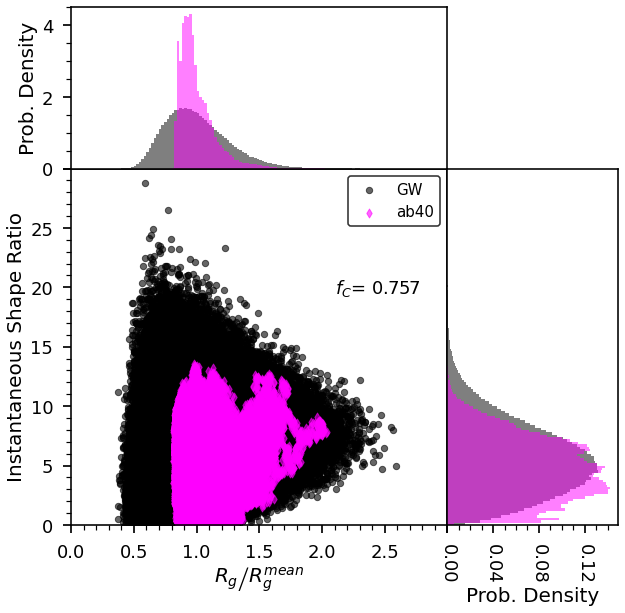

In [31]:
plot_protein_against_GW(list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Rg'].values**2),
                        list(ab40_ff14sb_rg_ree_ratheatmap_noimage['Ree'].values**2),'ab40','magenta')

In [20]:
GW_ind_runs_chainlen100_upto24

,chain_length,Rg2,Rend2,Rg/Rg_mean
0,100,24.502055,250.722530,0.721402
1,100,35.391603,222.164368,0.867015
2,100,64.015070,588.464481,1.166051
3,100,50.672894,251.421442,1.037443
4,100,37.537768,420.887479,0.892916
...,...,...,...,...
719995,100,66.564485,310.775147,1.189043
719996,100,119.291205,972.647027,1.591771
719997,100,74.587018,365.816020,1.258659
719998,100,70.248514,331.818938,1.221504
